In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
# Dataset: Modified World Happiness Report 2015
try:
    df = pd.read_csv('/Users/rcpearl/Downloads/archive/adult.csv')
except FileNotFoundError:
    print("world-happiness-report.csv not found locally.")

In [114]:
df.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [116]:
    df.columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'marital_status',
                  'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                  'hours_per_week', 'native_country', 'income']

selected_features = ['age', 'workclass', 'education', 'occupation', 'race', 'sex',
                     'hours_per_week', 'capital_gain', 'capital_loss', 'income']
df = df[selected_features]
# Step 2: Preprocess the Data
# Handle missing values
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [120]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [122]:
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)


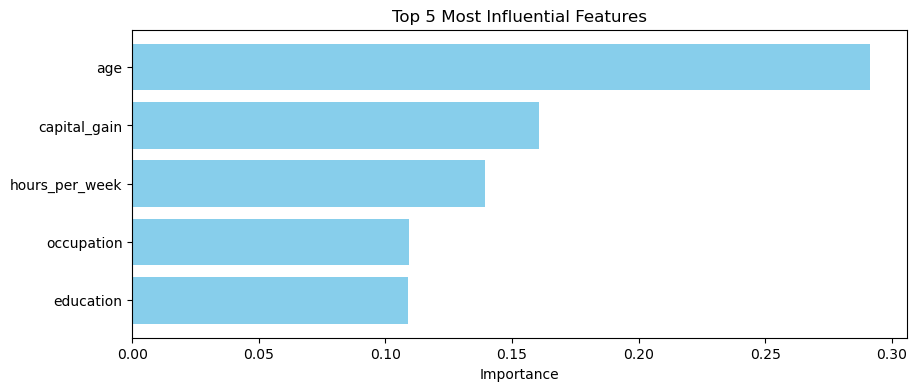

In [124]:
top5_features = feature_importances.head(5)
plt.figure(figsize=(10, 4))
plt.barh(top5_features['feature'], top5_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Most Influential Features')
plt.gca().invert_yaxis()
plt.show()